# Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Key attributes of the database

The database includes the following indicators:                                                                                    
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]                        
•	`country_long` (text): longer form of the country designation                                                               
•	`name` (text): name or title of the power plant, generally in Romanized form                                                
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant                                                       
•	`capacity_mw` (number): electrical generating capacity in megawatts                                                         
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)                                                      
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)                                                     
•	`primary_fuel` (text): energy source used in primary electricity generation or export                                       
•	`other_fuel1` (text): energy source used in electricity generation or export                                                
•	`other_fuel2` (text): energy source used in electricity generation or export                                                
•	`other_fuel3` (text): energy source used in electricity generation or export                                                
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available                   
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form                                        
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form       
•	`url` (text): web document corresponding to the `source` field                                                              
•	`geolocation_source` (text): attribution for geolocation information                                                        
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.                         
•	`year_of_capacity_data` (number): year the capacity information was reported                                                
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013                         
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014                         
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015                         
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016                         
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017                         
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018                         
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019                         
•	`generation_data_source` (text): attribution for the reported generation information                                        
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013              
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014               
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015               
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016               
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017               
•	'estimated_generation_note_2013` : label of the model/method used to estimate generation for the year 2013            
•	`estimated_generation_note_2014` : label of the model/method used to estimate generation for the year 2014             
•	`estimated_generation_note_2015` : label of the model/method used to estimate generation for the year 2015            
•	`estimated_generation_note_2016` : label of the model/method used to estimate generation for the year 2016            
•	`estimated_generation_note_2017` : label of the model/method used to estimate generation for the year 2017              




# Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing australia data
df1=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_AUS.csv')
df1

country country_long                                 name   gppd_idnr  \
0       AUS    Australia                     Adelaide Airport  AUS0000433   
1       AUS    Australia                 Adelaide Showgrounds  AUS0000432   
2       AUS    Australia                     Albany Wind Farm  AUS0000065   
3       AUS    Australia                Alice Springs Airport  AUS0000469   
4       AUS    Australia                         Amcor Gawler  AUS0000231   
..      ...          ...                                  ...         ...   
507     AUS    Australia                           Yarrawonga  AUS0000101   
508     AUS    Australia                               Yarwun  AUS0000173   
509     AUS    Australia                             Yuendumu  AUS0000465   
510     AUS    Australia                               Yulara  AUS0000257   
511     AUS    Australia  Yurralyi Maya (Karratha Seven Mile)  AUS0000218   

     capacity_mw  latitude  longitude primary_fuel  other_fuel1  other_fuel2  \
0           0.11  -34.9387   138.5377        Solar          NaN          NaN   
1           1.00  -34.9453   138.5882        Solar          NaN          NaN   
2          21.60  -35.0641   117.7977         Wind          NaN          NaN   
3           0.24  -23.7966   133.8971        Solar          NaN          NaN   
4           4.00  -34.5509   138.7659          Oil          NaN          NaN   
..           ...       ...        ...          ...          ...          ...   
507         9.00  -36.0094   145.9995        Hydro          NaN          NaN   
508       154.00  -23.8306   151.1519          Gas          NaN          NaN   
509         0.24  -22.2426   131.7931        Solar          NaN          NaN   
510        10.95  -25.2323   130.9912          Gas          NaN          NaN   
511       180.00  -20.7620   116.7420          Gas          NaN          NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                 2019.0                  NaN                 NaN   
1    ...                 2019.0                  NaN                 NaN   
2    ...                 2019.0            89.595278          102.642778   
3    ...                 2019.0                  NaN                 NaN   
4    ...                 2019.0                  NaN                 NaN   
..   ...                    ...                  ...                 ...   
507  ...                 2019.0            38.216111           44.224722   
508  ...                 2019.0                  NaN                 NaN   
509  ...                 2019.0                  NaN                 NaN   
510  ...                 2019.0            21.947500           22.775000   
511  ...                 2019.0                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2             96.555556           95.872778           85.900278   
3                   NaN                 NaN                 NaN   
4                   NaN                 NaN                 NaN   
..                  ...                 ...                 ...   
507           50.183889           46.035278           31.444722   
508                 NaN                 NaN                 NaN   
509                 NaN            5.216667            5.176944   
510           24.086111           23.043889           19.885000   
511          977.226944          945.557778          756.219167   

     generation_gwh_2018  generation_gwh_2019  \
0                    NaN                  NaN   
1                    NaN                  NaN   
2              92.682222                  NaN   
3                    NaN                  NaN   
4                    NaN                  NaN   
..                   ...                  ...   
507            37.317778                  NaN   
508     

In [3]:
#importing india data
df2=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv')
df2

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0              2.41461          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN              1.92500                 NaN   
904  ...                    NaN              2.05400                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

In [4]:
#importing USA data
df3=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_USA.csv')
df3
    

country              country_long                            name  \
0         USA  United States of America  10 Briggs Solar NG  LLC (East)   
1         USA  United States of America      100 Brook Hill Drive Solar   
2         USA  United States of America      1001 Ebenezer Church Solar   
3         USA  United States of America             1008 Matthews Solar   
4         USA  United States of America               1009 Yadkin Solar   
...       ...                       ...                             ...   
11874     USA  United States of America        Zotos International WPGF   
11875     USA  United States of America   Zumbro Community Solar Garden   
11876     USA  United States of America             Zumbro Solar Garden   
11877     USA  United States of America                            Zuni   
11878     USA  United States of America             eBay - South Jordan   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0      USA0062781          0.0   41.6327   -71.4963          NaN         NaN   
1      USA0063292          2.0   41.0930   -73.9828        Solar         NaN   
2      USA0063444          0.0   36.2838   -80.8434          NaN         NaN   
3      USA0063447          0.0   36.2167   -80.5525          NaN         NaN   
4      USA0063445          0.0   36.1475   -80.6561          NaN         NaN   
...           ...          ...       ...        ...          ...         ...   
11874  USA0057648          3.4   42.8869   -76.9683         Wind         NaN   
11875  USA0061574          1.0   44.3195   -92.6703        Solar         NaN   
11876  USA0063426          0.0   44.0460   -92.7600          NaN         NaN   
11877  USA0000478          0.0   39.7373  -105.0170          NaN         NaN   
11878  USA0059281          9.8   40.5606  -112.0478          Gas         NaN   

      other_fuel2  ... year_of_capacity_data  generation_gwh_2013  \
0             NaN  ...                2019.0                  NaN   
1             NaN  ...                2019.0                  NaN   
2             NaN  ...                2019.0                  NaN   
3             NaN  ...                2019.0                  NaN   
4             NaN  ...                2019.0                  NaN   
...           ...  ...                   ...                  ...   
11874         NaN  ...                2019.0                3.671   
11875         NaN  ...                2019.0                  NaN   
11876         NaN  ...                2019.0                  NaN   
11877         NaN  ...                2019.0                0.000   
11878         NaN  ...                2019.0               12.968   

      generation_gwh_2014 generation_gwh_2015 generation_gwh_2016  \
0                     NaN                 NaN                 NaN   
1                     NaN                 NaN                 NaN   
2                     NaN                 NaN                 NaN   
3                     NaN                 NaN                 NaN   
4                     NaN                 NaN                 NaN   
...                   ...                 ...                 ...   
11874             2.46015               2.489               1.670   
11875                 NaN                 NaN                 NaN   
11876                 NaN                 NaN                 NaN   
11877             0.00000               0.000                 NaN   
11878            51.27600              71.505              76.392   

      generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN              2.46700   
2                     NaN                  NaN                  NaN   
3                     NaN                  NaN                  NaN   
4                     NaN                  NaN                  NaN   
...                   ...                  ...              

In [5]:
#creating final dataset
df= pd.concat([df1, df2, df3], axis=0)
df

country              country_long                           name  \
0         AUS                 Australia               Adelaide Airport   
1         AUS                 Australia           Adelaide Showgrounds   
2         AUS                 Australia               Albany Wind Farm   
3         AUS                 Australia          Alice Springs Airport   
4         AUS                 Australia                   Amcor Gawler   
...       ...                       ...                            ...   
11874     USA  United States of America       Zotos International WPGF   
11875     USA  United States of America  Zumbro Community Solar Garden   
11876     USA  United States of America            Zumbro Solar Garden   
11877     USA  United States of America                           Zuni   
11878     USA  United States of America            eBay - South Jordan   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0      AUS0000433         0.11  -34.9387   138.5377        Solar         NaN   
1      AUS0000432         1.00  -34.9453   138.5882        Solar         NaN   
2      AUS0000065        21.60  -35.0641   117.7977         Wind         NaN   
3      AUS0000469         0.24  -23.7966   133.8971        Solar         NaN   
4      AUS0000231         4.00  -34.5509   138.7659          Oil         NaN   
...           ...          ...       ...        ...          ...         ...   
11874  USA0057648         3.40   42.8869   -76.9683         Wind         NaN   
11875  USA0061574         1.00   44.3195   -92.6703        Solar         NaN   
11876  USA0063426         0.00   44.0460   -92.7600          NaN         NaN   
11877  USA0000478         0.00   39.7373  -105.0170          NaN         NaN   
11878  USA0059281         9.80   40.5606  -112.0478          Gas         NaN   

      other_fuel2  ... year_of_capacity_data  generation_gwh_2013  \
0             NaN  ...                2019.0                  NaN   
1             NaN  ...                2019.0                  NaN   
2             NaN  ...                2019.0            89.595278   
3             NaN  ...                2019.0                  NaN   
4             NaN  ...                2019.0                  NaN   
...           ...  ...                   ...                  ...   
11874         NaN  ...                2019.0             3.671000   
11875         NaN  ...                2019.0                  NaN   
11876         NaN  ...                2019.0                  NaN   
11877         NaN  ...                2019.0             0.000000   
11878         NaN  ...                2019.0            12.968000   

      generation_gwh_2014 generation_gwh_2015 generation_gwh_2016  \
0                     NaN                 NaN                 NaN   
1                     NaN                 NaN                 NaN   
2              102.642778           96.555556           95.872778   
3                     NaN                 NaN                 NaN   
4                     NaN                 NaN                 NaN   
...                   ...                 ...                 ...   
11874            2.460150            2.489000            1.670000   
11875                 NaN                 NaN                 NaN   
11876                 NaN                 NaN                 NaN   
11877            0.000000            0.000000                 NaN   
11878           51.276000           71.505000           76.392000   

      generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN                  NaN   
2               85.900278            92.682222                  NaN   
3                     NaN                  NaN                  NaN   
4                     NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
1

In [6]:
df.head()

country country_long                   name   gppd_idnr  capacity_mw  \
0     AUS    Australia       Adelaide Airport  AUS0000433         0.11   
1     AUS    Australia   Adelaide Showgrounds  AUS0000432         1.00   
2     AUS    Australia       Albany Wind Farm  AUS0000065        21.60   
3     AUS    Australia  Alice Springs Airport  AUS0000469         0.24   
4     AUS    Australia           Amcor Gawler  AUS0000231         4.00   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0  -34.9387   138.5377        Solar         NaN         NaN  ...   
1  -34.9453   138.5882        Solar         NaN         NaN  ...   
2  -35.0641   117.7977         Wind         NaN         NaN  ...   
3  -23.7966   133.8971        Solar         NaN         NaN  ...   
4  -34.5509   138.7659          Oil         NaN         NaN  ...   

  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                2019.0                  NaN                 NaN   
1                2019.0                  NaN                 NaN   
2                2019.0            89.595278          102.642778   
3                2019.0                  NaN                 NaN   
4                2019.0                  NaN                 NaN   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2           96.555556           95.872778           85.900278   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   generation_gwh_2018  generation_gwh_2019            generation_data_source  \
0                  NaN                  NaN                               NaN   
1                  NaN                  NaN                               NaN   
2            92.682222                  NaN  Australia Clean Energy Regulator   
3                  NaN                  NaN                               NaN   
4                  NaN                  NaN                               NaN   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [7]:
df.tail()

country              country_long                           name  \
11874     USA  United States of America       Zotos International WPGF   
11875     USA  United States of America  Zumbro Community Solar Garden   
11876     USA  United States of America            Zumbro Solar Garden   
11877     USA  United States of America                           Zuni   
11878     USA  United States of America            eBay - South Jordan   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
11874  USA0057648          3.4   42.8869   -76.9683         Wind         NaN   
11875  USA0061574          1.0   44.3195   -92.6703        Solar         NaN   
11876  USA0063426          0.0   44.0460   -92.7600          NaN         NaN   
11877  USA0000478          0.0   39.7373  -105.0170          NaN         NaN   
11878  USA0059281          9.8   40.5606  -112.0478          Gas         NaN   

      other_fuel2  ... year_of_capacity_data  generation_gwh_2013  \
11874         NaN  ...                2019.0                3.671   
11875         NaN  ...                2019.0                  NaN   
11876         NaN  ...                2019.0                  NaN   
11877         NaN  ...                2019.0                0.000   
11878         NaN  ...                2019.0               12.968   

      generation_gwh_2014 generation_gwh_2015 generation_gwh_2016  \
11874             2.46015               2.489               1.670   
11875                 NaN                 NaN                 NaN   
11876                 NaN                 NaN                 NaN   
11877             0.00000               0.000                 NaN   
11878            51.27600              71.505              76.392   

      generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
11874             1.23349                2.630                1.211   
11875                 NaN                1.161                1.589   
11876                 NaN                  NaN                  NaN   
11877                 NaN                  NaN                  NaN   
11878            76.63100               75.228             72.06506   

                       generation_data_source  estimated_generation_gwh  
11874  U.S. Energy Information Administration                       NaN  
11875  U.S. Energy Information Administration                       NaN  
11876                                     NaN                       NaN  
11877  U.S. Energy Information Administration                       NaN  
11878  U.S. Energy Information Administration                       NaN  

[5 rows x 27 columns]

In [8]:
#shape of dataset
df.shape

(13298, 27)

Dataset contains 13298 rows and 27 columns.

In [9]:
#columns of dataset
df.columns.tolist()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

In [10]:
#checking for datatypes
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                  object
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019          object
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [11]:
#info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url        

1) Dataset contains 13 columns of float64 datatype and 14 types of object datatype .
2) There are presence of null values.
3) memory usage is 2.8+ MB

In [12]:
#checking for duplicate values
df.duplicated().sum()

0

There are no presence of duplicated values

In [13]:
#checking for unique values of each column
df.nunique()

country                         3
country_long                    3
name                        13266
gppd_idnr                   13298
capacity_mw                  2304
latitude                    12385
longitude                   12733
primary_fuel                   14
other_fuel1                    12
other_fuel2                    11
other_fuel3                     9
commissioning_year           1936
owner                        5877
source                        206
url                           325
geolocation_source              5
wepp_id                         0
year_of_capacity_data           1
generation_gwh_2013          5616
generation_gwh_2014          6306
generation_gwh_2015          6692
generation_gwh_2016          7150
generation_gwh_2017          7630
generation_gwh_2018          8040
generation_gwh_2019          8368
generation_data_source          3
estimated_generation_gwh        0
dtype: int64

# Null values

In [14]:
df.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64

<Axes: >

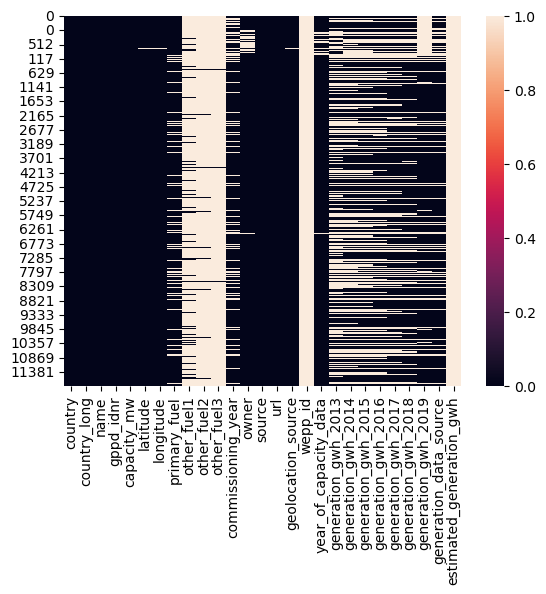

In [15]:
#visualization of null values
sns.heatmap(df.isnull())

Null values are present in the dataset.

# Handling null values

In [16]:
((df.isnull().sum()/len(df))*100).sort_values(ascending = False)

estimated_generation_gwh    100.000000
wepp_id                     100.000000
other_fuel3                  99.308167
other_fuel2                  97.969619
other_fuel1                  87.757558
generation_gwh_2013          46.082118
generation_gwh_2014          43.344864
generation_gwh_2015          39.893217
generation_gwh_2016          34.569108
generation_gwh_2017          30.124831
generation_gwh_2019          26.470146
generation_gwh_2018          25.868552
commissioning_year           19.882689
generation_data_source       18.521582
primary_fuel                 15.069935
owner                         4.459317
year_of_capacity_data         3.293728
longitude                     0.586554
latitude                      0.586554
geolocation_source            0.172958
capacity_mw                   0.045120
country                       0.000000
url                           0.000000
country_long                  0.000000
gppd_idnr                     0.000000
name                     

The columns estimated_generation_gwh,wepp_id,other_fuel3,other_fuel2,other_fuel1 contains almost 100 percent null values so we will drop these columns

In [17]:
df.drop(columns=['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel2','other_fuel1'],axis=1,inplace =True)

In [18]:
#droping unwanted columns
df.drop(columns=['country', 'country_long','url','generation_gwh_2019','source','generation_data_source','year_of_capacity_data','geolocation_source'],axis=1,inplace=True)

In [19]:
df['name'].value_counts()

name
Richland                      3
Central Utility Plant         2
Gladstone                     2
Franklin Solar                2
Hunter                        2
                             ..
E F Barrett                   1
E F Oxnard Energy Facility    1
E J West                      1
E Nash PV1                    1
eBay - South Jordan           1
Name: count, Length: 13266, dtype: int64

In [20]:
#droping 'name' column as it contains almost all unique values
df.drop(columns=['name','gppd_idnr'],axis=1,inplace=True)

In [21]:
df.isnull().sum()

capacity_mw               6
latitude                 78
longitude                78
primary_fuel           2004
commissioning_year     2644
owner                   593
generation_gwh_2013    6128
generation_gwh_2014    5764
generation_gwh_2015    5305
generation_gwh_2016    4597
generation_gwh_2017    4006
generation_gwh_2018    3440
dtype: int64

In [22]:
df.drop(columns=['owner'],axis=1,inplace=True)

In [23]:
#filling null values with zero value
col = ['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
df[col]=df[col].fillna(0)

In [24]:
#filling numerical columns with mean value
for i in df.columns:
    if df[i].dtypes =='float64':
        df[i] = df[i].fillna(np.mean(df[i])) 

In [25]:
mode_value = df['primary_fuel'].mode()[0]  
df['primary_fuel'] = df['primary_fuel'].fillna(mode_value)

In [26]:
#rechecking the null values
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

<Axes: >

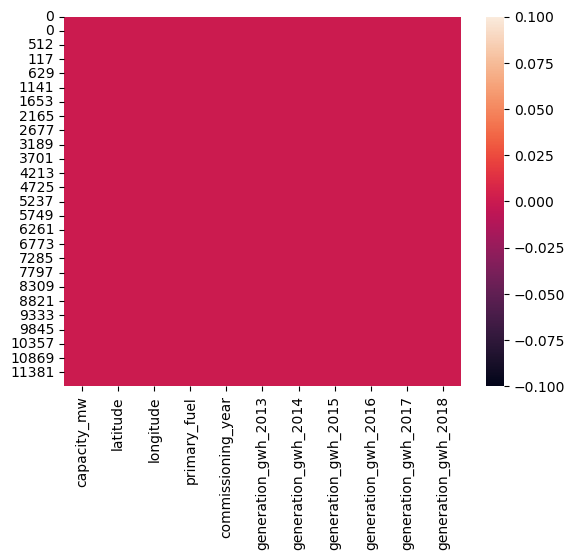

In [27]:
sns.heatmap(df.isnull())

All null values has been removed from dataset.

# Stastical summary

In [28]:
df.describe()

capacity_mw      latitude     longitude  commissioning_year  \
count  13298.000000  13298.000000  13298.000000        13298.000000   
mean     117.738717     35.053213    -73.794217         1998.184904   
std      347.090703     15.398830     62.684169           21.497701   
min        0.000000    -42.888300   -171.712400         1896.000000   
25%        1.500000     33.914250   -104.583400         1993.500000   
50%        5.500000     38.330650    -87.104400         2000.295163   
75%       52.975000     42.166025    -75.291600         2014.000000   
max     6809.000000    425.246100    153.434100         2020.000000   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
count         13298.000000         13298.000000         13298.000000   
mean            563.383222           360.179210           370.739766   
std            1490.941253          1680.540822          1692.570573   
min            -947.600000          -989.619000          -864.428000   
25%              15.063500             0.000000             0.000000   
50%             563.383222             0.004000             0.186500   
75%             563.383222            34.949500            40.148450   
max           31431.080000         32320.917000         32525.595000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
count         13298.000000         13298.000000         13298.000000  
mean            367.580614           372.066048           380.797695  
std            1679.916178          1690.724691          1705.432660  
min            -768.620000          -934.944000          -982.622000  
25%               0.000000             0.000000             0.000000  
50%               1.788000             2.865000             3.797000  
75%              45.893500            51.903250            56.527000  
max           32377.477000         35116.000000         35136.000000

1) All counts are same means there are no presence of null values.
2) data are skewed.
3) The gap between 75percentile and max value represents the presence of outliers. 

# Exploratory Data Analysis (EDA) and Visualization

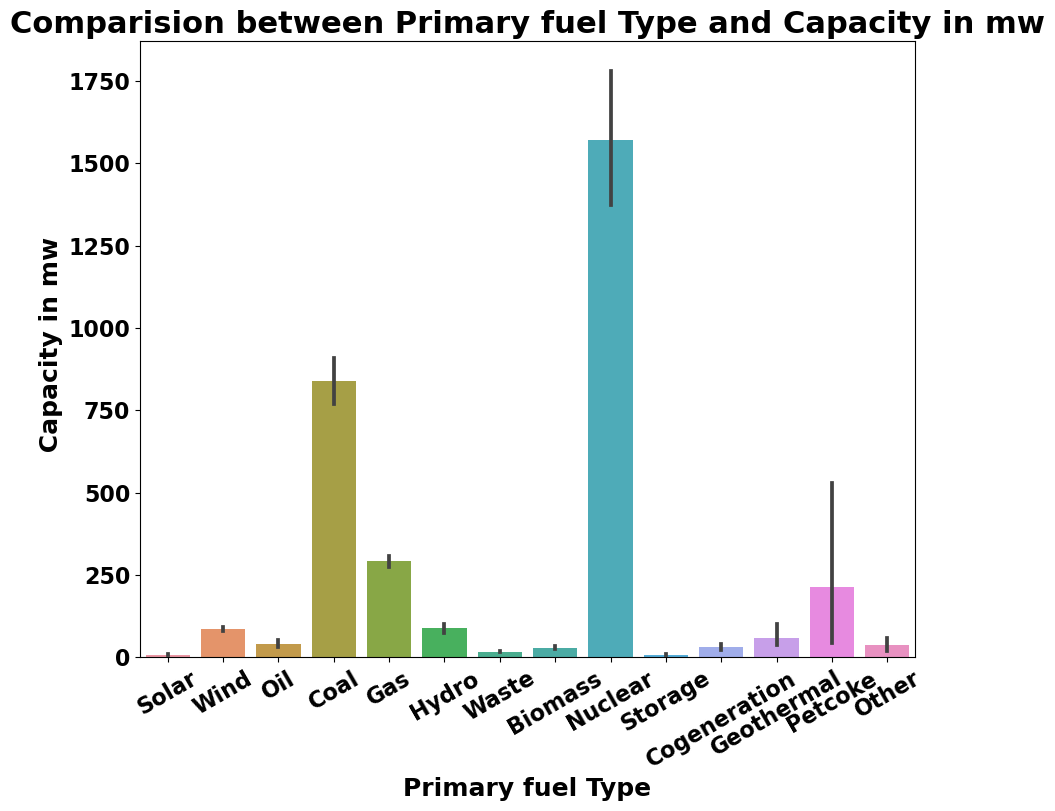

In [29]:
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel(' Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

 Nuclear generates high capacity.Followed by coal,gas and petcoke.Solar generates less capacity.



In [30]:
# energy generated by Fuel type.
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])

sum
primary_fuel               
Biomass         6715.960000
Coal          480531.320000
Cogeneration    1042.000000
Gas           591625.326000
Geothermal      3889.200000
Hydro         156623.420000
Nuclear       113013.100000
Oil            40081.580000
Other            572.400000
Petcoke         2361.600000
Solar          43541.138717
Storage          815.600000
Waste           9957.126000
Wind          114919.683583

<Axes: xlabel='primary_fuel', ylabel='count'>

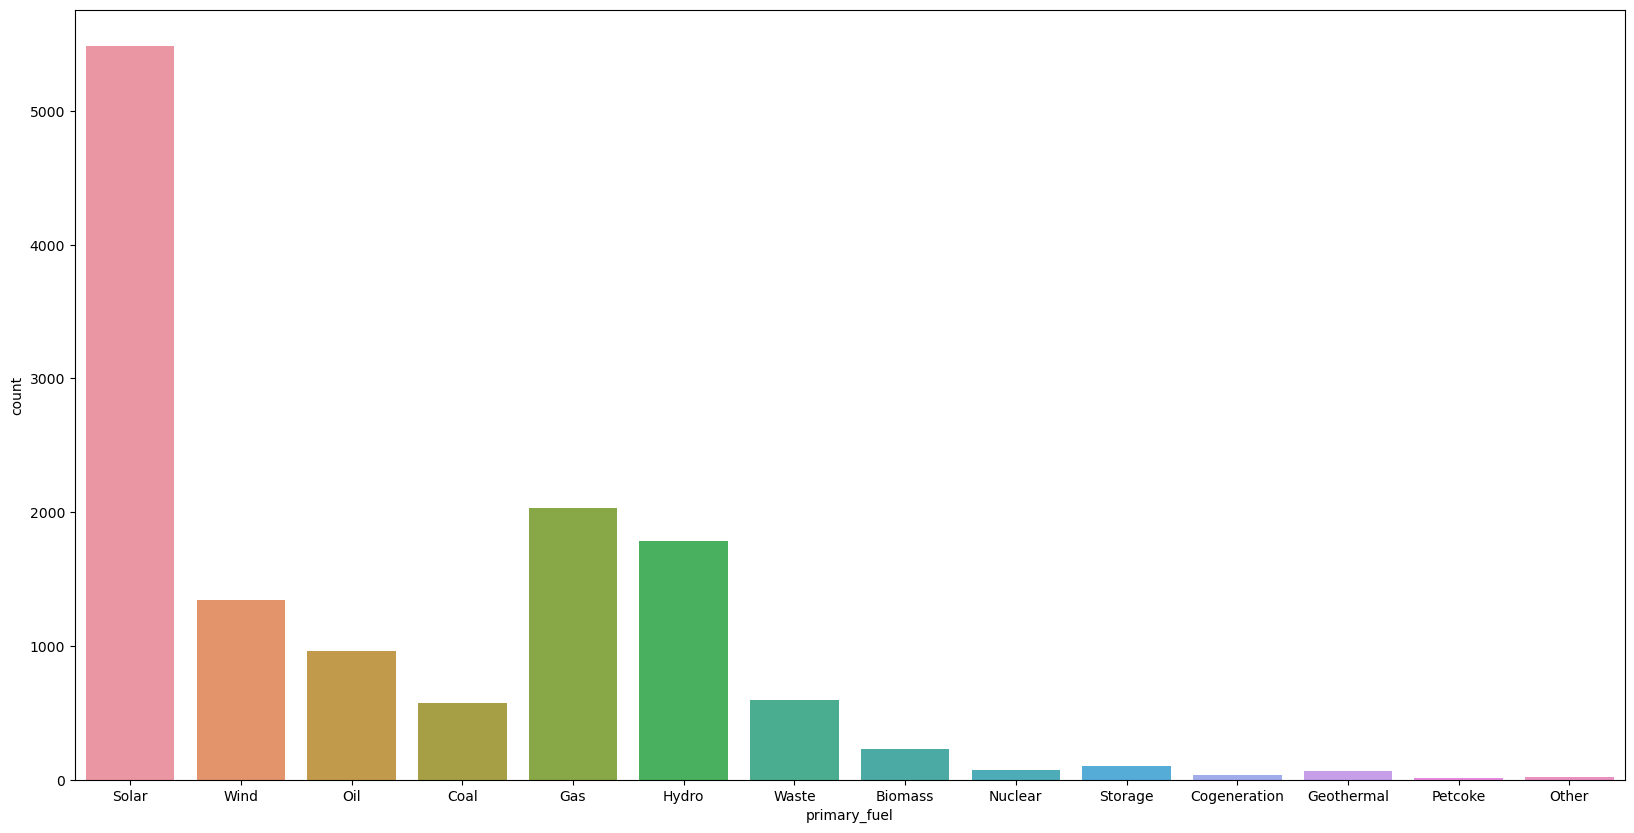

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(x='primary_fuel',data=df)

In [32]:
#seperating categorical and numerical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] =='object':
        cat_col.append(i)
print("Categorical column :",cat_col)
print("\n")



num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print('Numerical column :',num_col)

Categorical column : ['primary_fuel']


Numerical column : ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


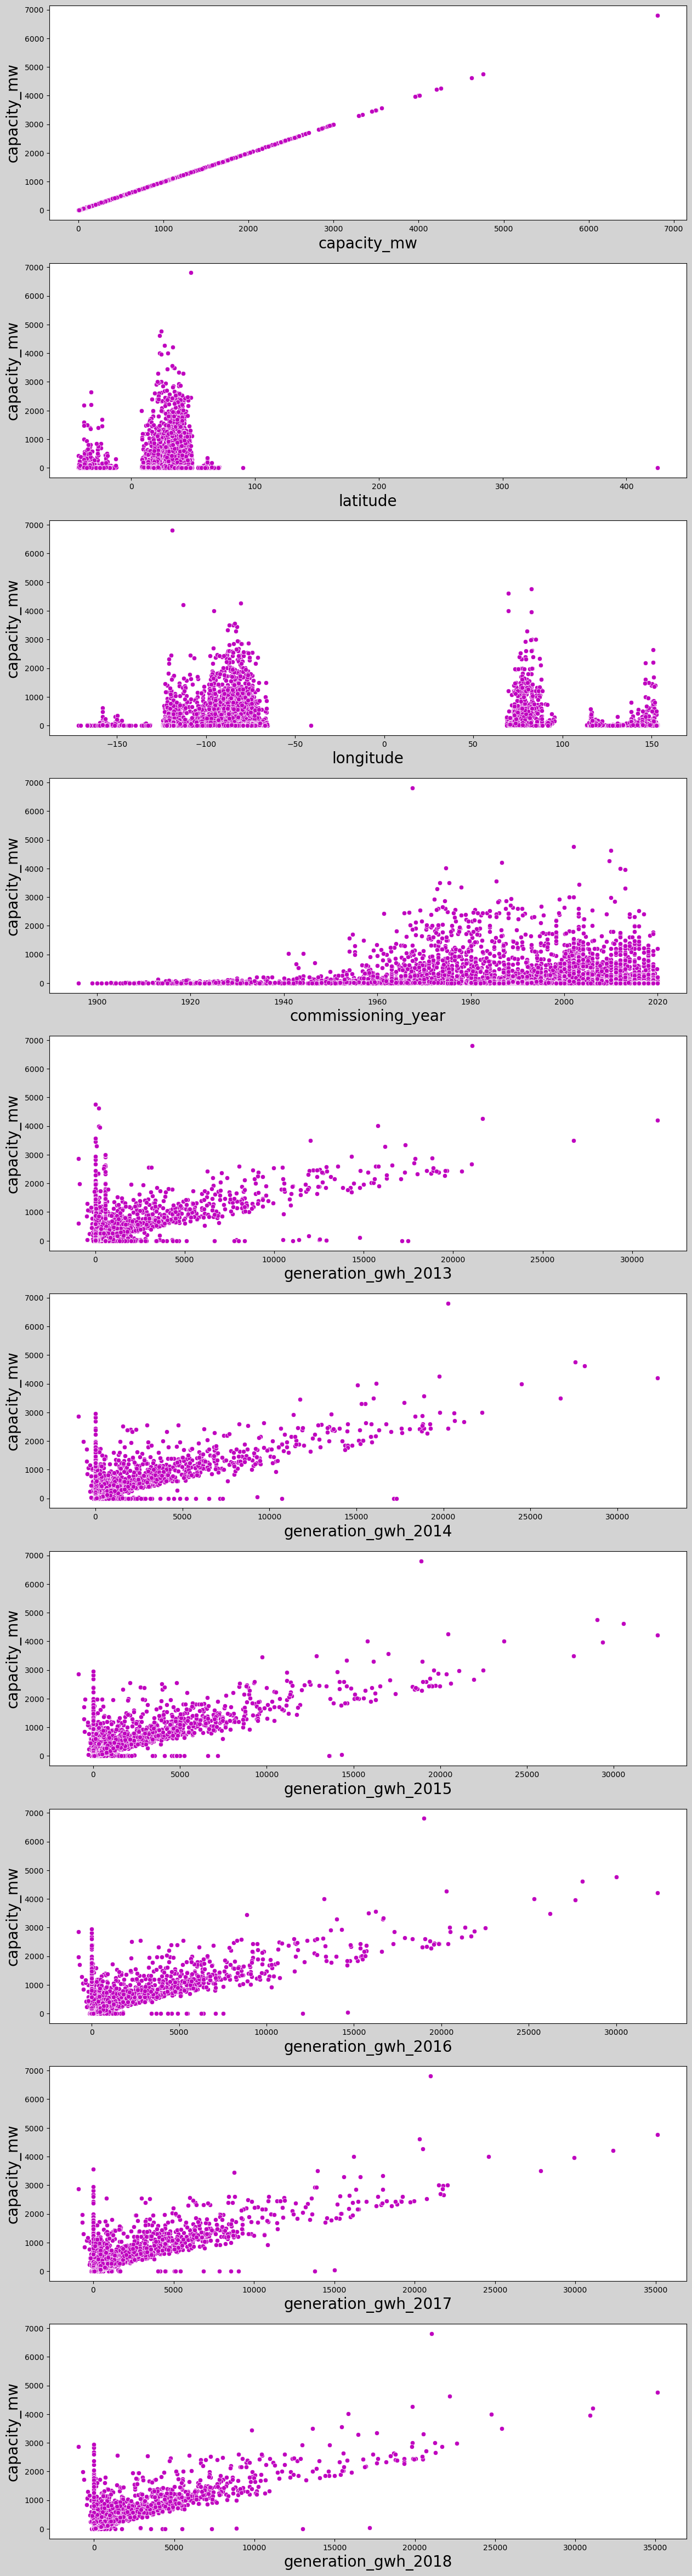

In [33]:
plt.figure(figsize=(15,60), facecolor='lightgrey')
plotnumber=1

X = df.drop(columns=['capacity_mw'])
Y = df['capacity_mw']

for column in num_col:
    if plotnumber<=10:
        ax=plt.subplot(10,1,plotnumber)
        sns.scatterplot(x=df[column],y=Y,color ='m')
        plt.xlabel(column, fontsize=20)
        plt.ylabel('capacity_mw',fontsize=20)
    plotnumber+=1
plt.show() 

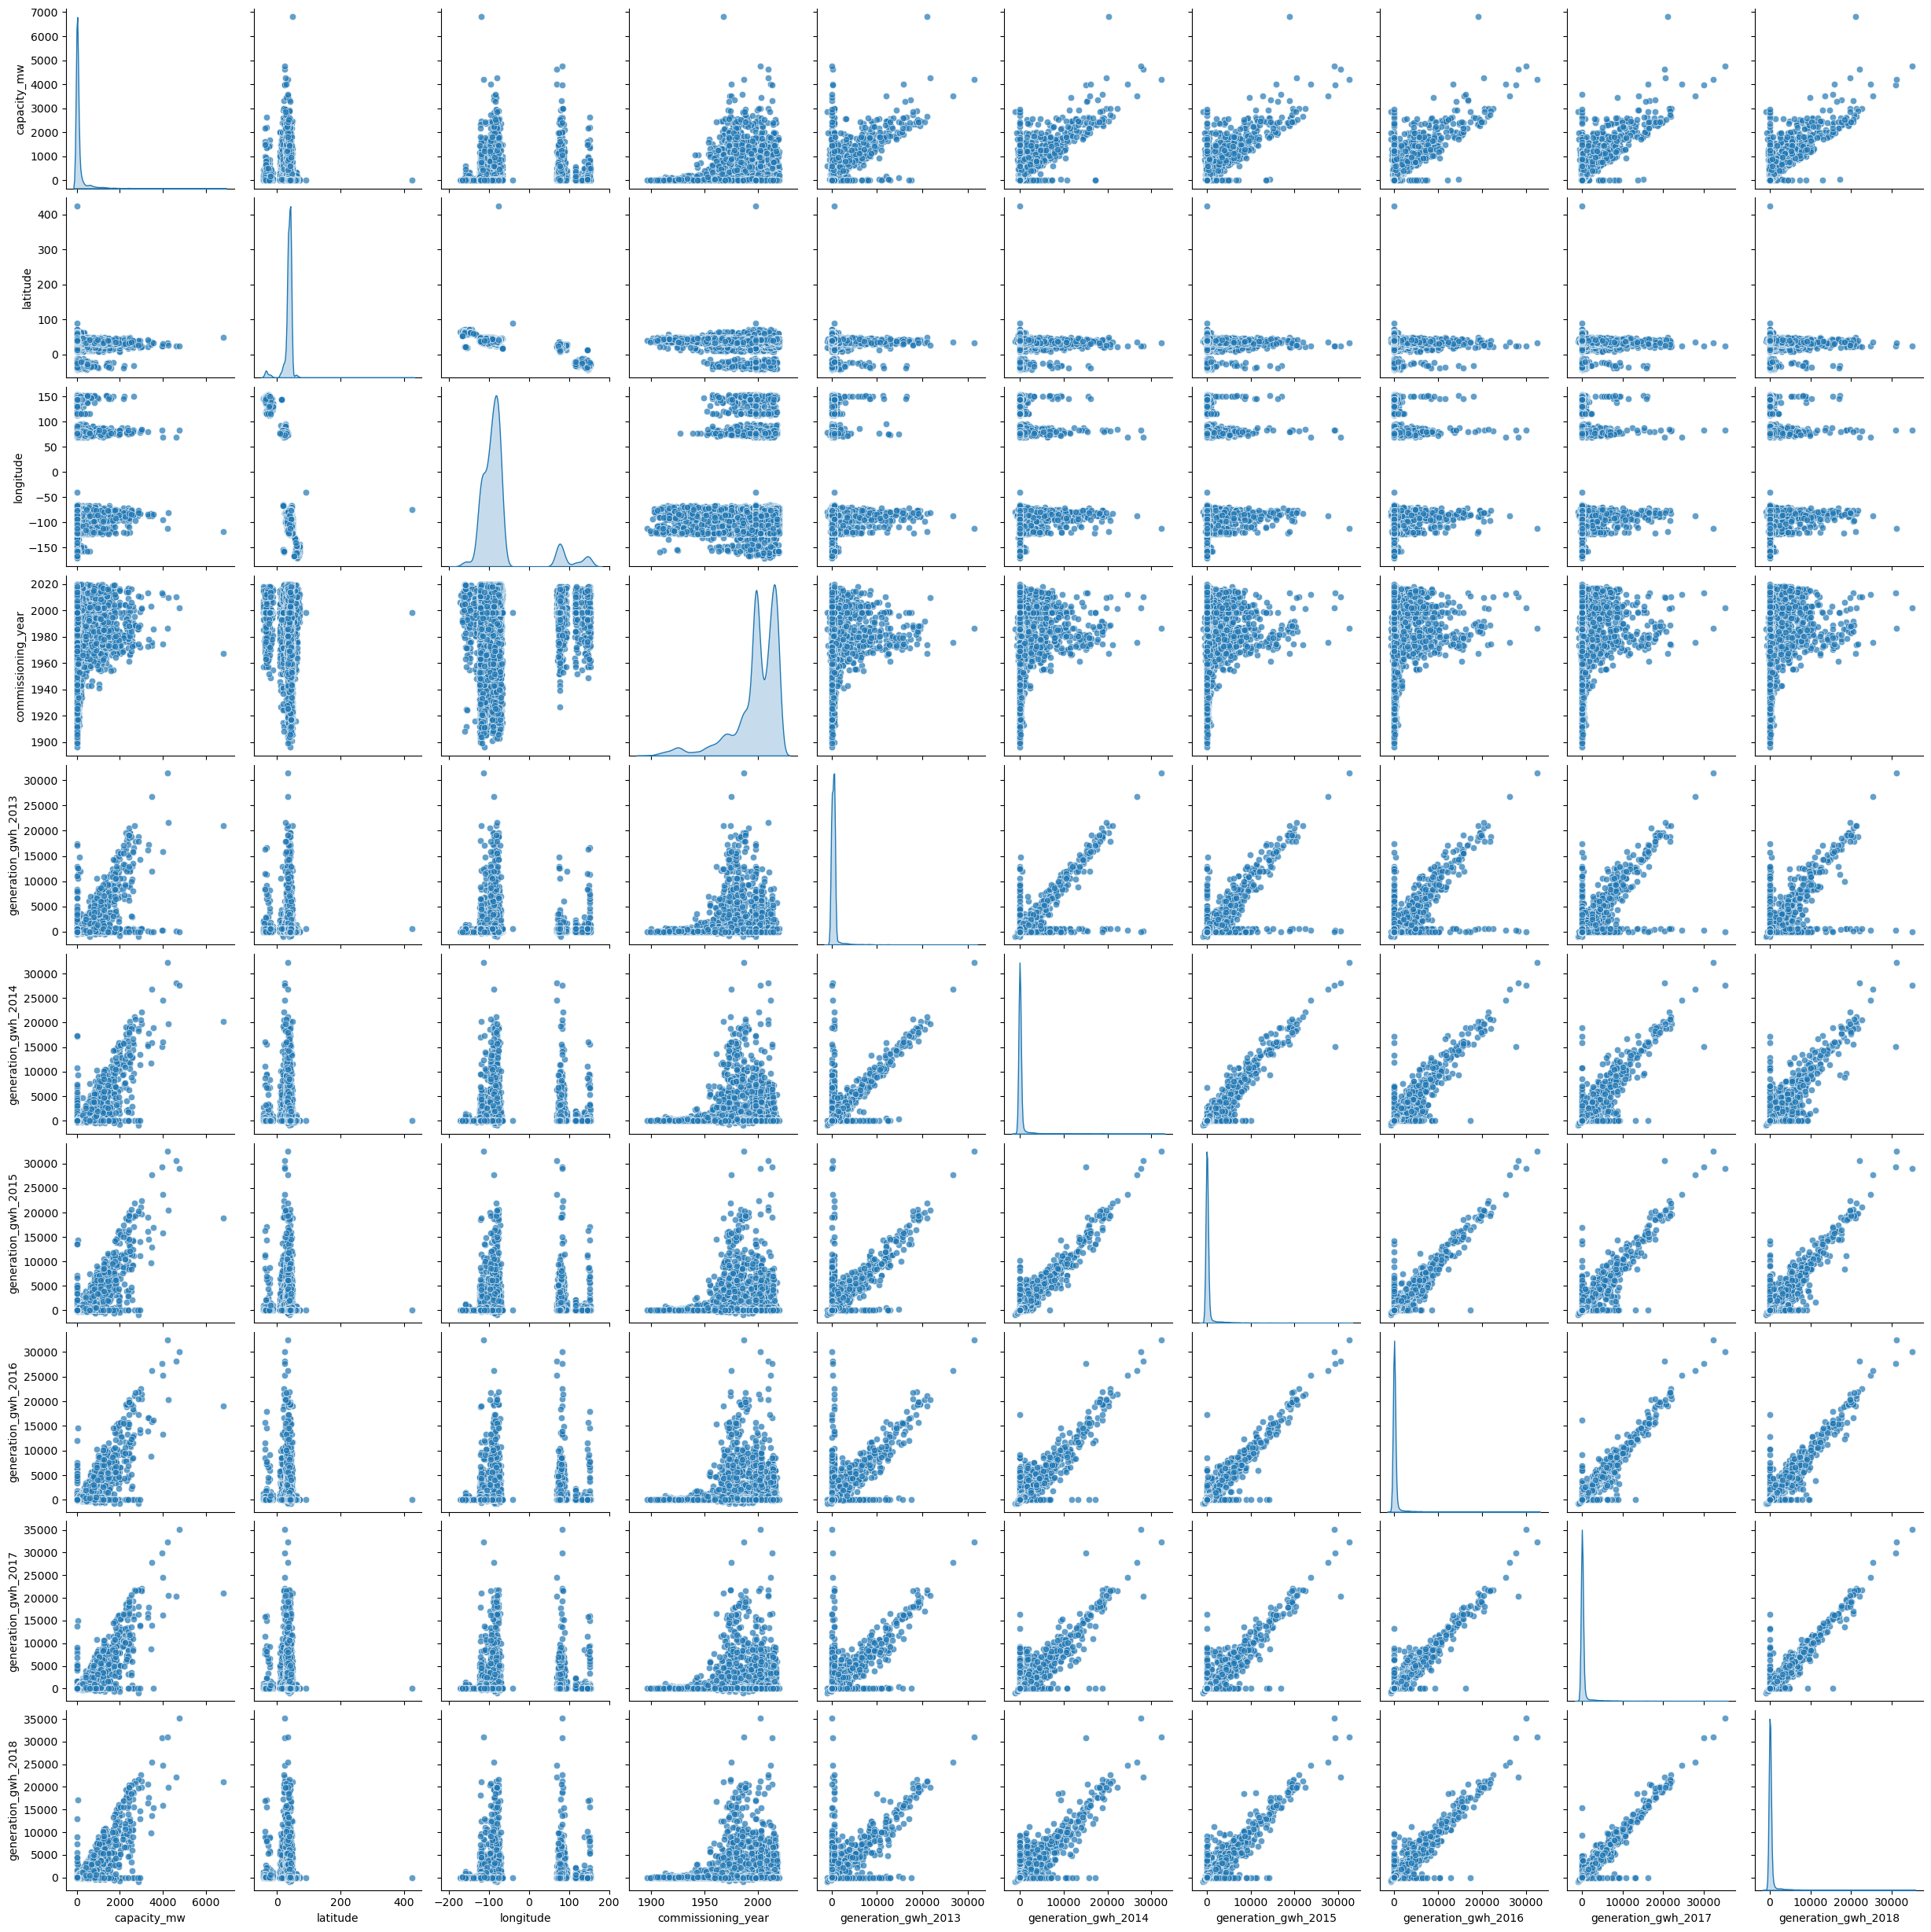

In [34]:
sns.pairplot(df,palette='bright', markers=["o", "s", "D"], diag_kind='kde', plot_kws={'alpha': 0.7})
plt.show()

# Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['primary_fuel'] = le.fit_transform(df['primary_fuel'])

In [36]:
df['primary_fuel'].value_counts()

primary_fuel
10    5484
3     2031
5     1783
13    1340
7      961
12     595
1      572
0      230
11     104
6       72
4       65
2       34
8       16
9       11
Name: count, dtype: int64

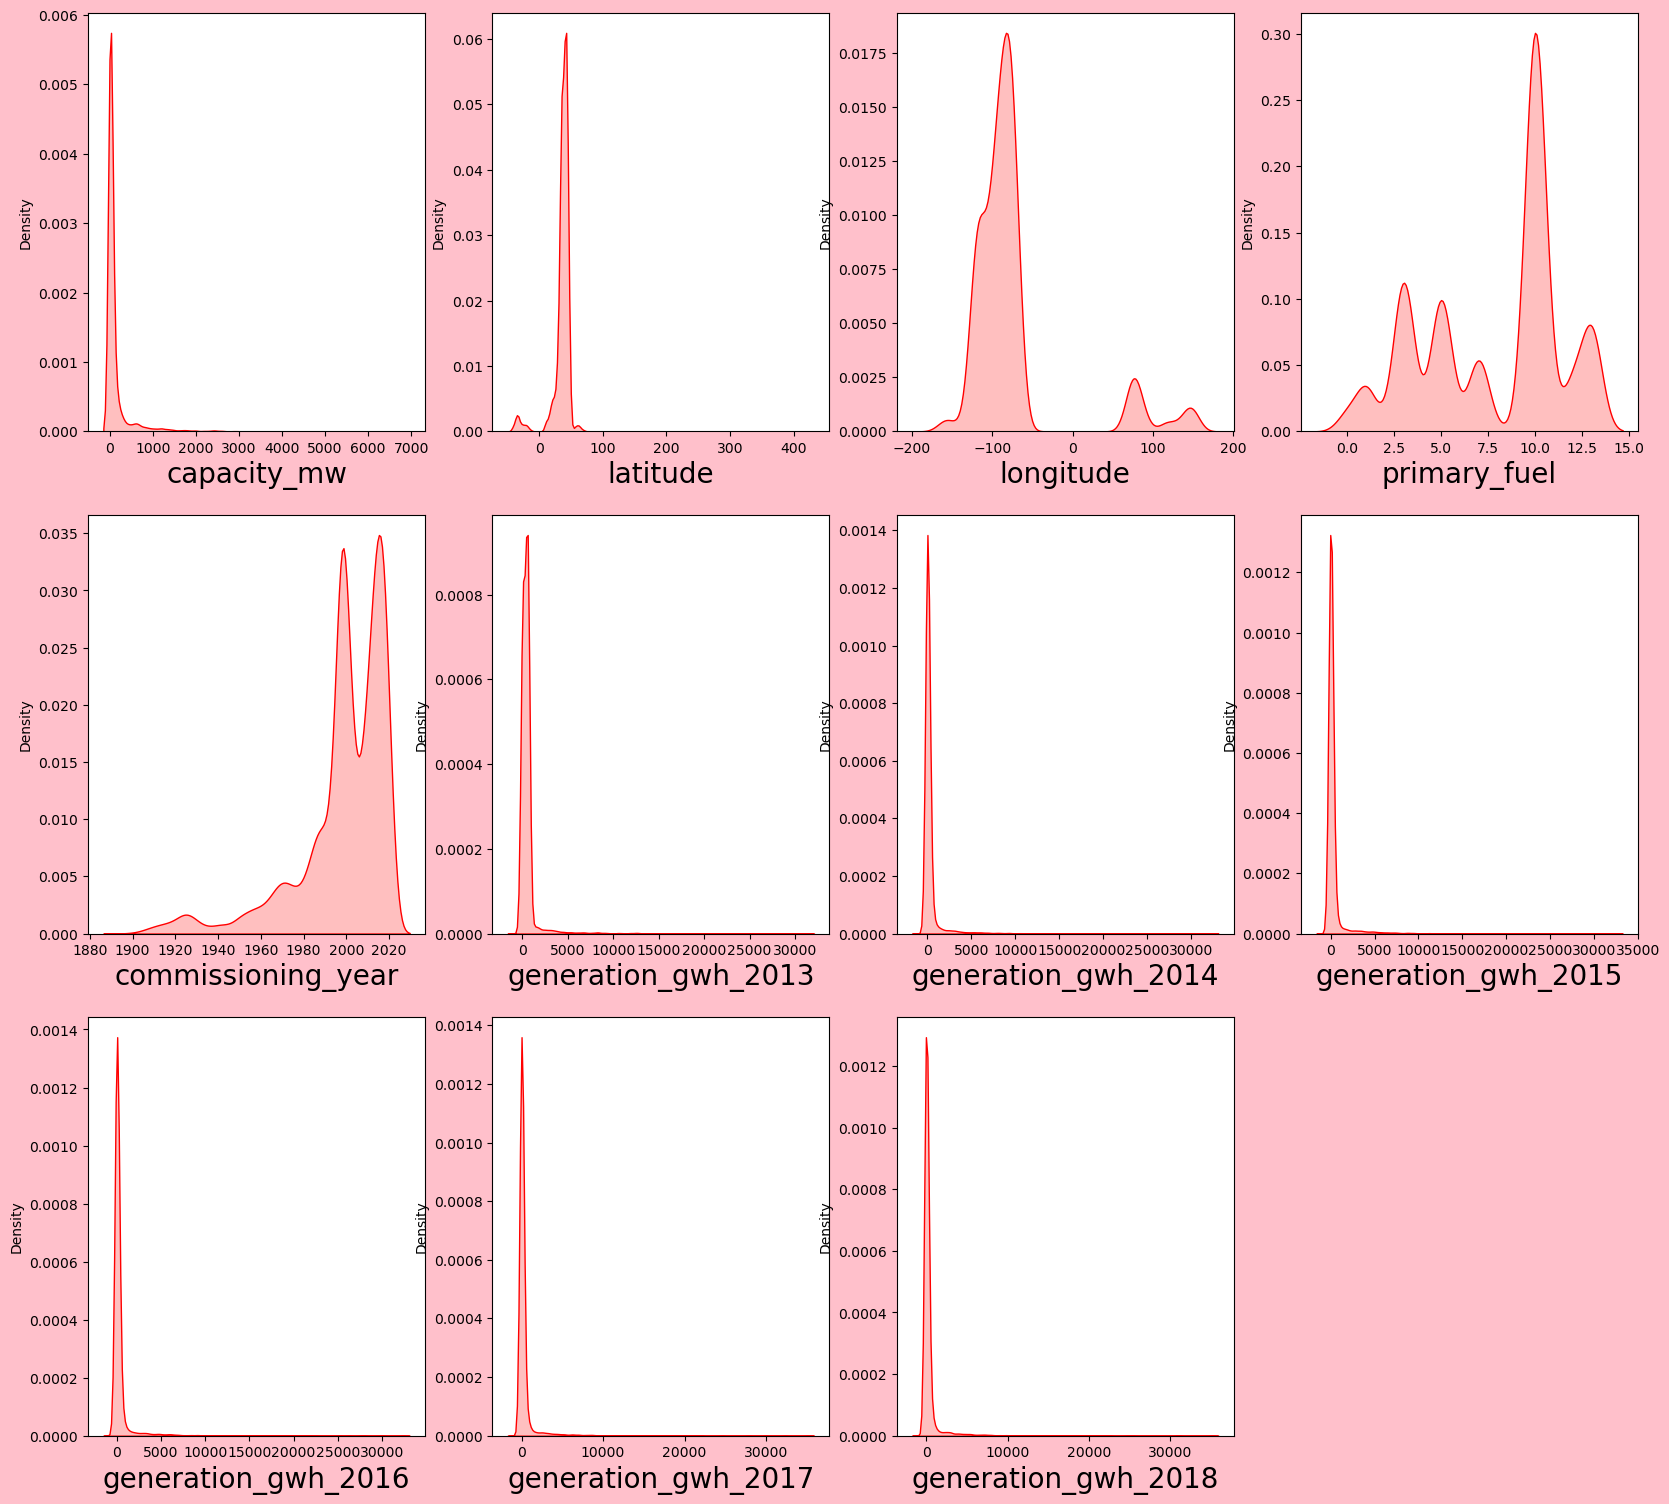

capacity_mw            5.474681
latitude              -1.864012
longitude              2.331246
primary_fuel          -0.419215
commissioning_year    -1.867007
generation_gwh_2013    8.468532
generation_gwh_2014    8.076996
generation_gwh_2015    8.219212
generation_gwh_2016    8.280632
generation_gwh_2017    8.359591
generation_gwh_2018    8.293077
dtype: float64


In [37]:
#checking for skewness
plt.figure(figsize=(20,25), facecolor='pink')
plotnumber =1
for column in df:
    if plotnumber <=14:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()
print(df.skew())

Dataset is skewed

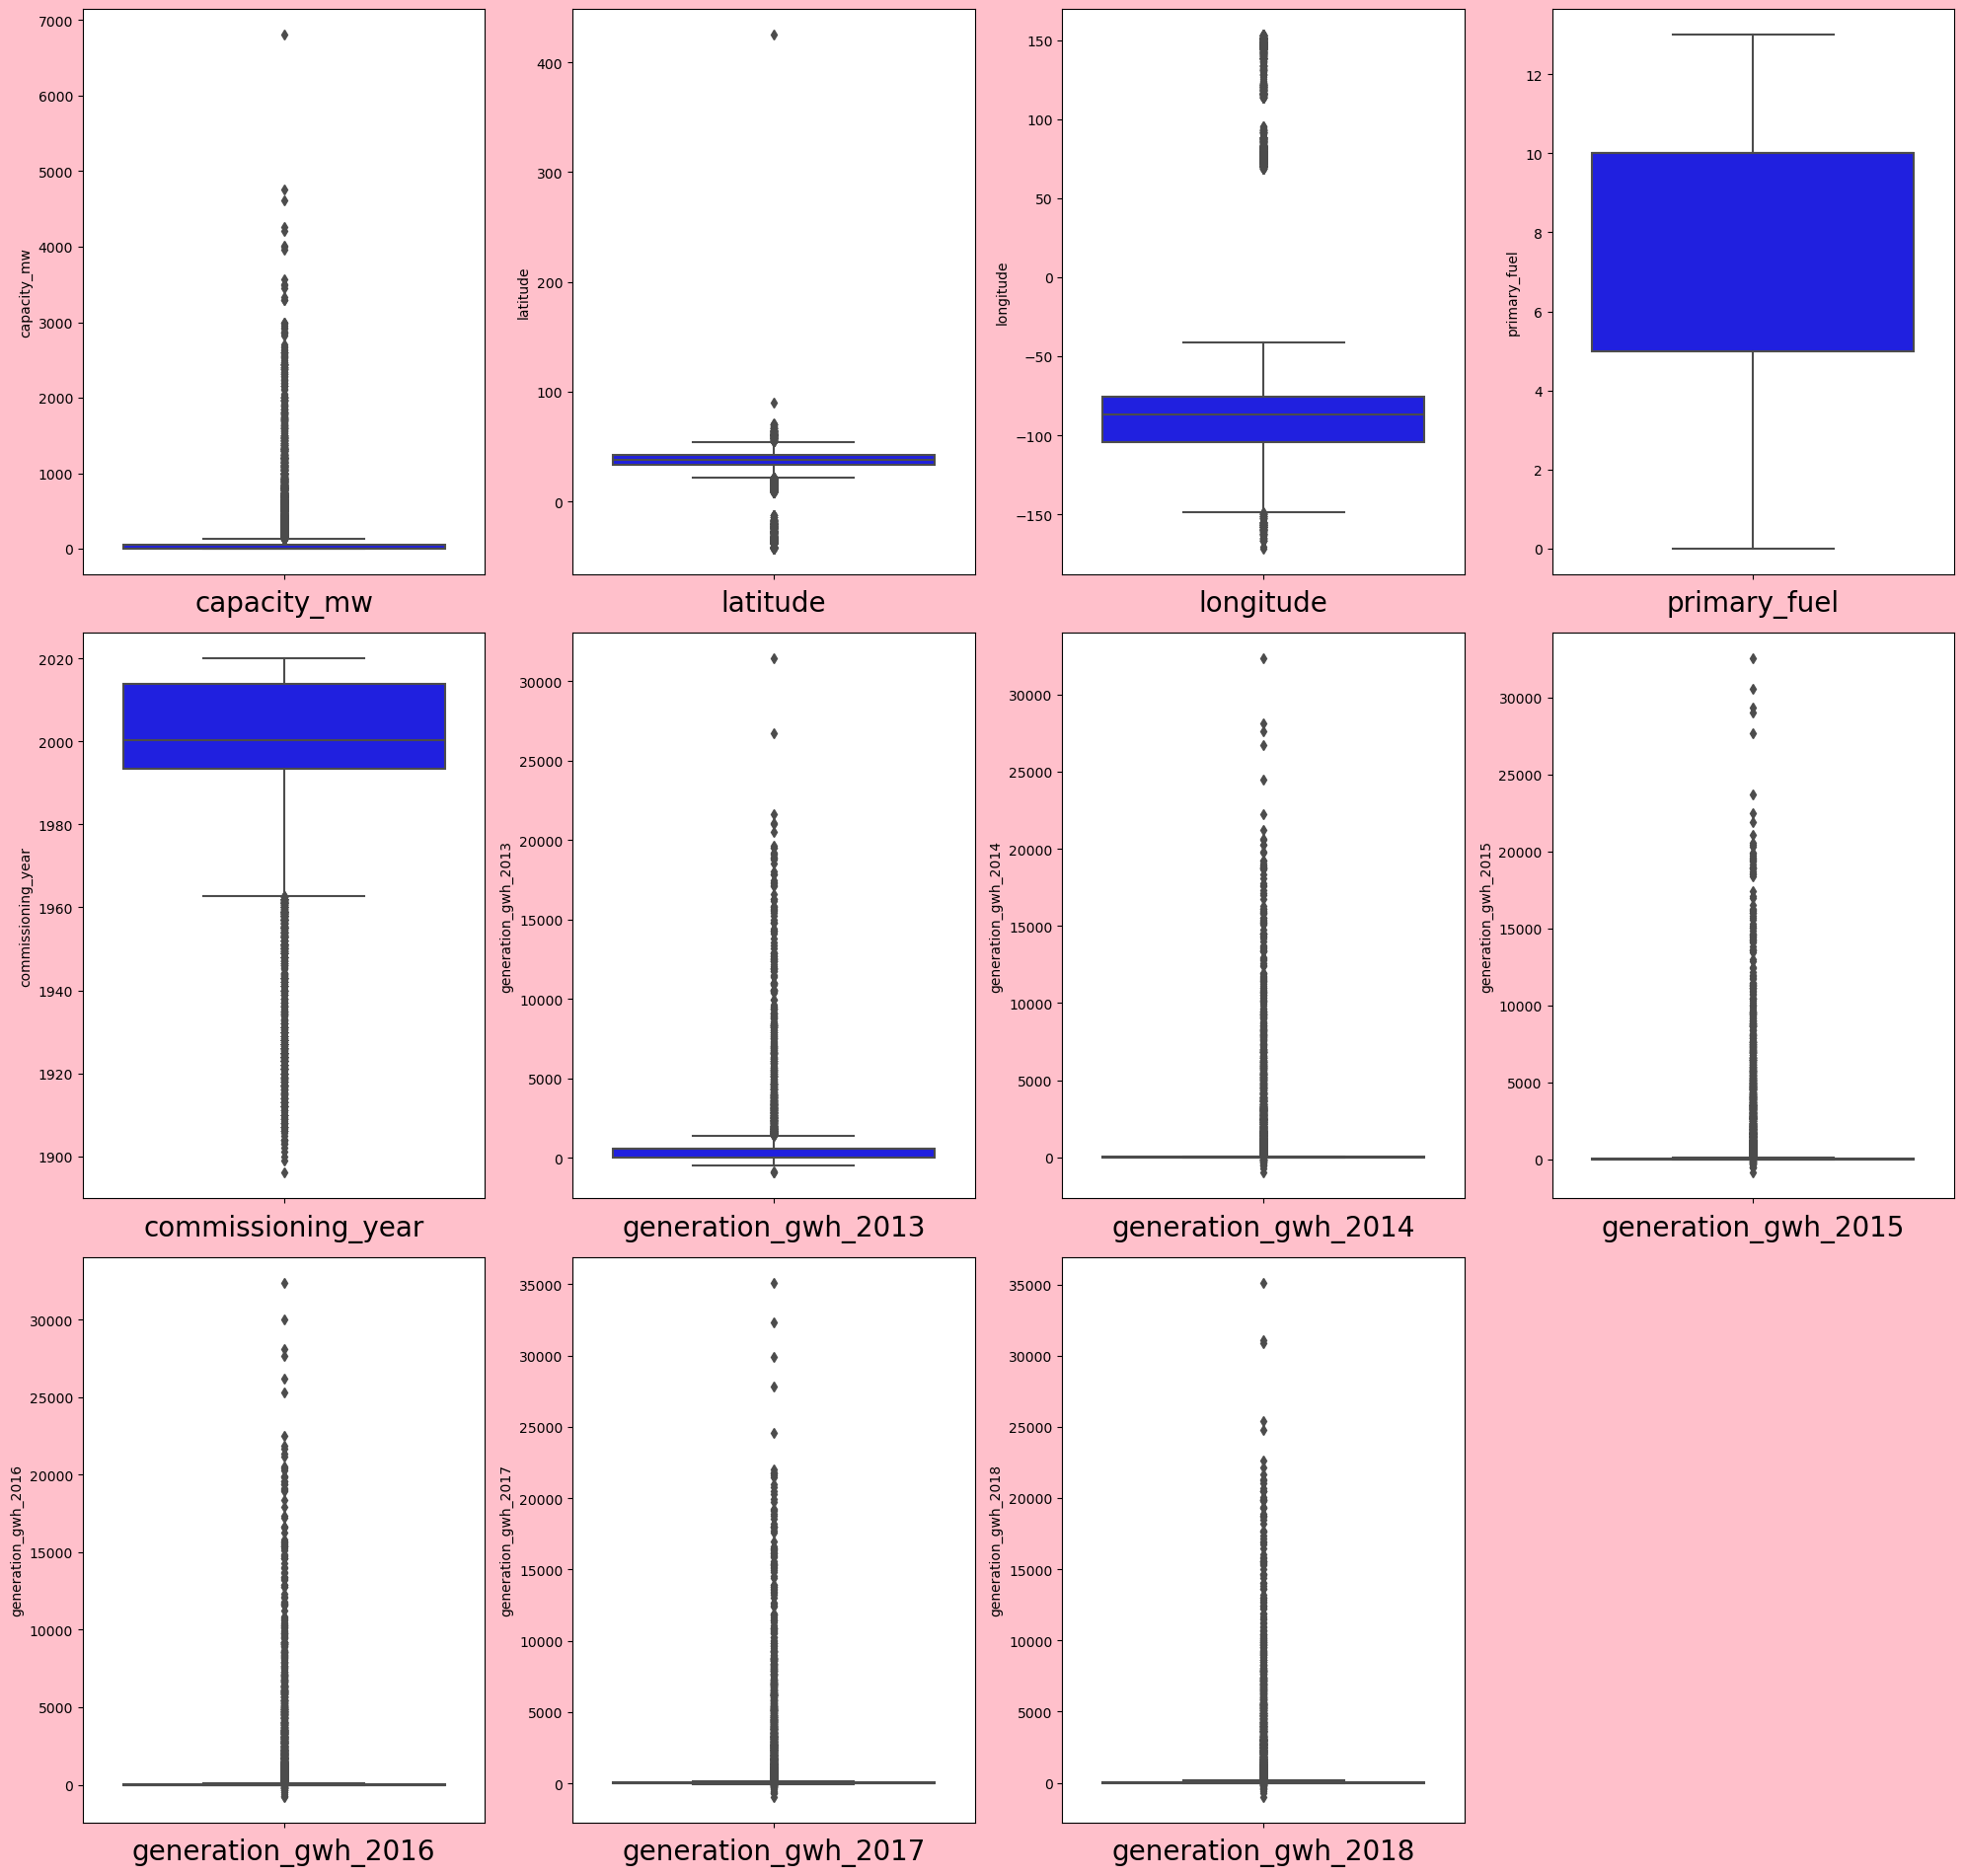

In [38]:
#checking for outliers
plt.figure(figsize=(20, 25), facecolor='pink')

plotnumber = 1
num_columns = min(len(df.columns), 16)

for i in range(num_columns):
    ax = plt.subplot(4, 4, plotnumber)
    sns.boxplot(y=df.iloc[:, i], color='b', ax=ax)
    ax.set_xlabel(df.columns[i], fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

Every columns have outliers except 'primary_fuel'

# Removing outliers

In [39]:
from scipy.stats import zscore


In [40]:
z=np.abs(zscore(df))
df1= df[(z < 3).all(axis=1)]   

In [41]:
df1.shape

(11923, 11)

In [42]:
df.shape

(13298, 11)

In [43]:
# Checking the percentage of data loss -
loss = (df.shape[0]-df1.shape[0])/df.shape[0]*100
loss

10.339900736952925

# Correlation

In [44]:
df1.corr()

capacity_mw  latitude  longitude  primary_fuel  \
capacity_mw             1.000000 -0.145724   0.120745     -0.369344   
latitude               -0.145724  1.000000  -0.555955      0.095199   
longitude               0.120745 -0.555955   1.000000     -0.145464   
primary_fuel           -0.369344  0.095199  -0.145464      1.000000   
commissioning_year     -0.128559 -0.000947  -0.052356      0.451344   
generation_gwh_2013     0.407247 -0.090149   0.026900     -0.024104   
generation_gwh_2014     0.631731 -0.108830   0.116390     -0.270502   
generation_gwh_2015     0.669176 -0.105820   0.104238     -0.278563   
generation_gwh_2016     0.677512 -0.103938   0.101294     -0.269196   
generation_gwh_2017     0.675550 -0.107008   0.107762     -0.259542   
generation_gwh_2018     0.717819 -0.109068   0.107126     -0.267492   

                     commissioning_year  generation_gwh_2013  \
capacity_mw                   -0.128559             0.407247   
latitude                      -0.000947            -0.090149   
longitude                     -0.052356             0.026900   
primary_fuel                   0.451344            -0.024104   
commissioning_year             1.000000             0.128872   
generation_gwh_2013            0.128872             1.000000   
generation_gwh_2014           -0.131757             0.644404   
generation_gwh_2015           -0.106199             0.625739   
generation_gwh_2016           -0.087844             0.578262   
generation_gwh_2017           -0.082298             0.559277   
generation_gwh_2018           -0.069032             0.546436   

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw                     0.631731             0.669176   
latitude                       -0.108830            -0.105820   
longitude                       0.116390             0.104238   
primary_fuel                   -0.270502            -0.278563   
commissioning_year             -0.131757            -0.106199   
generation_gwh_2013             0.644404             0.625739   
generation_gwh_2014             1.000000             0.911463   
generation_gwh_2015             0.911463             1.000000   
generation_gwh_2016             0.860246             0.935721   
generation_gwh_2017             0.826751             0.893723   
generation_gwh_2018             0.791361             0.852594   

                     generation_gwh_2016  generation_gwh_2017  \
capacity_mw                     0.677512             0.675550   
latitude                       -0.103938            -0.107008   
longitude                       0.101294             0.107762   
primary_fuel                   -0.269196            -0.259542   
commissioning_year             -0.087844            -0.082298   
generation_gwh_2013             0.578262             0.559277   
generation_gwh_2014             0.860246             0.826751   
generation_gwh_2015             0.935721             0.893723   
generation_gwh_2016             1.000000             0.954608   
generation_gwh_2017             0.954608             1.000000   
generation_gwh_2018             0.902759             0.929464   

                     generation_gwh_2018  
capacity_mw                     0.717819  
latitude                       -0.109068  
longitude                       0.107126  
primary_fuel                   -0.267492  
commissioning_year             -0.069032  
generation_gwh_2013             0.546436  
generation_gwh_2014             0.791361  
generation_gwh_2015             0.852594  
generation_gwh_2016             0.902759  
generation_gwh_2017             0.929464  
generation_gwh_2018             1.000000

<Axes: >

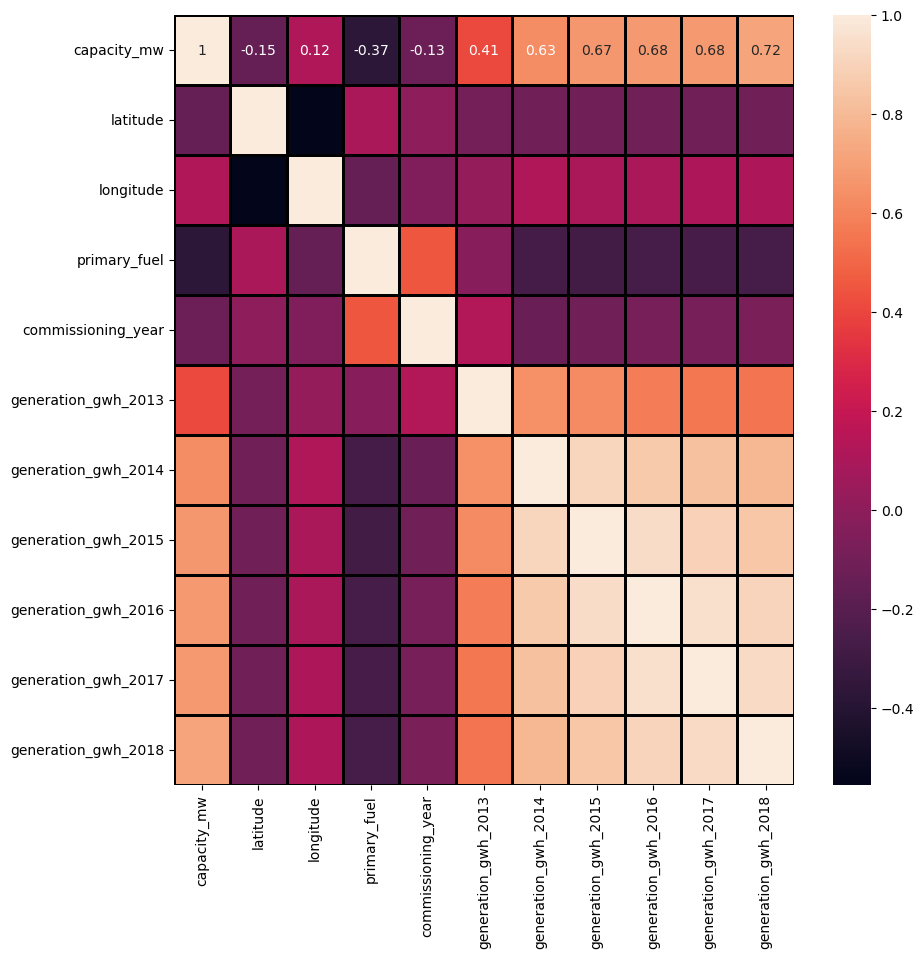

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True,linewidths=1,linecolor='black')

eneration_gwh_2014, generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 and generation_gwh_2018 are positively correlated with the target variabke 'capacity_mw'. Whereas , latitude, longitude,primary_fuel,other_fuel1 and commisioning_year is negatively correlated with the target variable ' capacity_mw'.

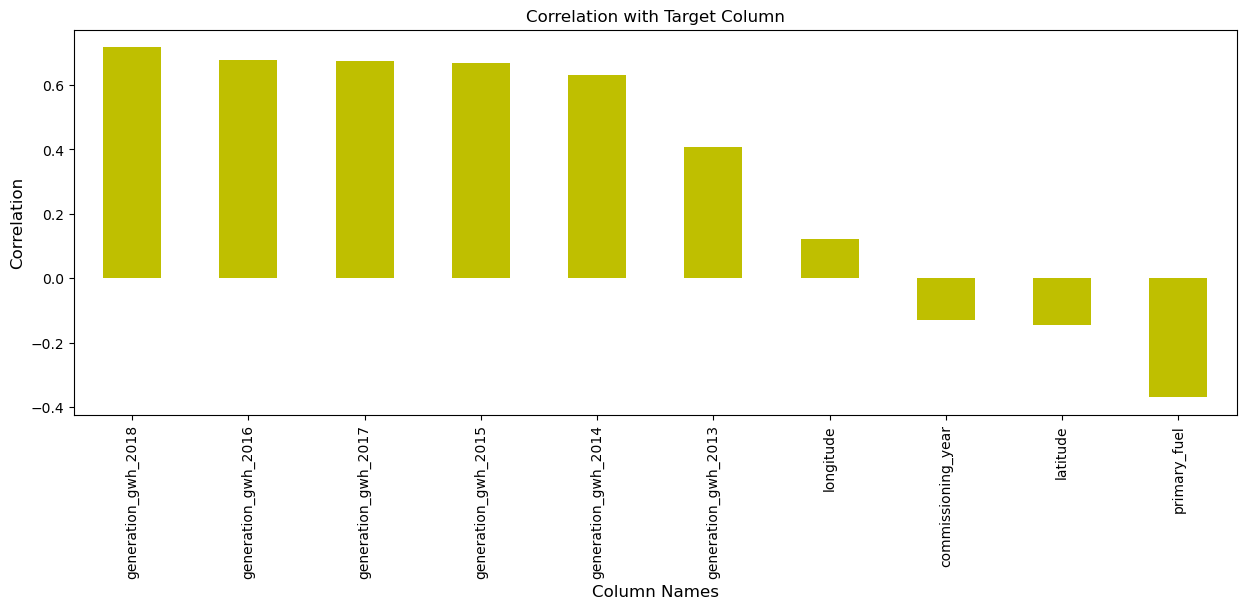

In [46]:
#considering target variable as capacity_mw
plt.figure(figsize = [15,5])
df1.corr()['capacity_mw'].sort_values(ascending= False).drop('capacity_mw').plot(kind = 'bar', color ='y')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

 'primary_fuel' has the most negative correlation with 'capacity_mw'

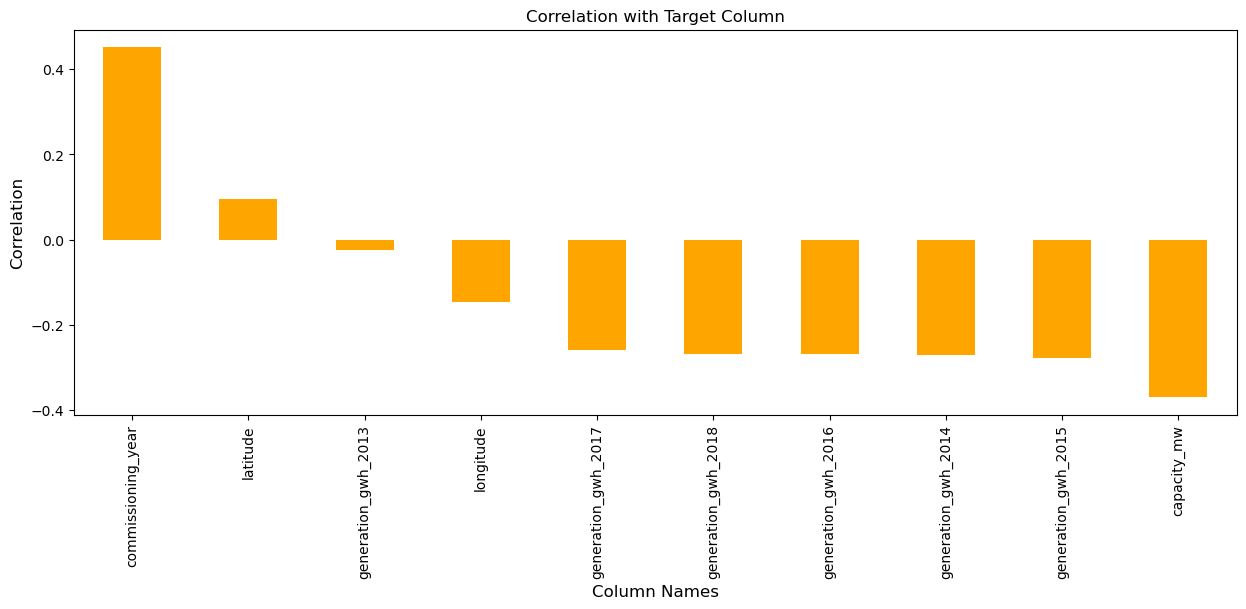

In [47]:
#considering target variable as primary_fuel
plt.figure(figsize = [15,5])
df1.corr()['primary_fuel'].sort_values(ascending= False).drop('primary_fuel').plot(kind = 'bar', color ='orange')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

Except 'commissioning year','latitude','longitude' columns all aother columns have negative correlation with target 'primary_fuel'.

# multicollinearity

In [48]:
#checking for multicollinearity using Variance inflation factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [49]:
vif=pd.DataFrame()

In [50]:
vif['Features']=df.columns
vif['VIF']=[variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]

vif

Features        VIF
0           capacity_mw   2.680741
1              latitude  43.056924
2             longitude   6.536183
3          primary_fuel   7.784214
4    commissioning_year  39.911437
5   generation_gwh_2013   3.089008
6   generation_gwh_2014   6.832072
7   generation_gwh_2015  13.607814
8   generation_gwh_2016  19.831188
9   generation_gwh_2017  17.016738
10  generation_gwh_2018   9.086386

Multicollinearity exists so we will use Principal Component Analysis (PCA) to handle this.

# 1.Model for predicting 'Primary Fuel'

In [51]:
#Spliting data into x and target y
x=df1.drop(columns='primary_fuel')
y=df1['primary_fuel']

In [52]:
x.shape,y.shape

((11923, 10), (11923,))

In [53]:
from sklearn.decomposition import PCA

In [54]:
pca=PCA()
x_pca=pca.fit_transform(x)

In [55]:
X=pd.DataFrame(x_pca,columns=np.arange(10))

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["Features List"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

Features List  VIF
0              0  1.0
1              1  1.0
2              2  1.0
3              3  1.0
4              4  1.0
5              5  1.0
6              6  1.0
7              7  1.0
8              8  1.0
9              9  1.0

Multicollinearity is resolved.

# Model Building

In [57]:
#importing required libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.metrics import r2_score


# Scaling


In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
st=StandardScaler()
x_new=st.fit_transform(X)

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=.3,random_state=40)

In [61]:
model=[DecisionTreeClassifier(),SVC(),GaussianNB(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier()]

In [62]:
from sklearn.linear_model import LogisticRegression

maxAccu=0
maxRS=0
for i in range(50,300):
    x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size = 0.2, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.6649895178197065 on Random_state 218


In [63]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=.3,random_state=218)

In [64]:
for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print(m,'Evaluztion matics is :')
    print('Accuracy Score :\n', accuracy_score(y_test, y_pred))
    print('\n')
    print('Confusion matrix :\n',confusion_matrix(y_test, y_pred))
    print('\n')
    print('Classification Report :\n',classification_report(y_test, y_pred))
    print('********************************************************************************************************')
    

DecisionTreeClassifier() Evaluztion matics is :
Accuracy Score :
 0.7341347497903271


Confusion matrix :
 [[  15    7    1   10    0    9    0    1    0    0    5    0    2    6]
 [   2   45    0   18    0    7    0    5    1    0    4    0    1    6]
 [   1    0    0    1    0    0    0    0    1    0    0    0    3    1]
 [  23   32    1  304    4   30    2   51    1    2   26    1   33   31]
 [   0    0    1    5    6    1    0    0    0    0    1    0    6    2]
 [   3   19    0   37    1  246    0   16    1    1   10    0   23   12]
 [   0    1    0    1    0    0    0    0    0    0    1    0    1    0]
 [   2    3    2   49    0    9    0  171    0    0    3    1    6   10]
 [   1    0    0    0    0    1    0    0    0    0    0    0    0    0]
 [   0    0    0    3    0    1    0    0    0    0    0    0    0    0]
 [   7    8    2   39    2    9    0   12    0    0 1528   12   21   44]
 [   0    2    0    4    0    0    0    1    1    0   17   10    1    2]
 [  10    3    3 

Here RandomForestClassifier is giving best accuracy score that is 0.81

# Cross Validation Score

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
rf=RandomForestClassifier()
score=cross_val_score(rf,x_new,y,cv=5)
print('\n')
print('Cross Validation Score of ',rf,':')
print('Score :',score)
print('Mean Score :',score.mean())
print('Standard Deviation :',score.std())
    



Cross Validation Score of  RandomForestClassifier() :
Score : [0.65744235 0.81593291 0.83060797 0.80201342 0.80956376]
Mean Score : 0.7831120819439168
Standard Deviation : 0.06353408528754946


# Hyper  Parameter Tuning

In [67]:
from sklearn.model_selection import GridSearchCV
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],
             'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}
gcv = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)
gcv.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [30, 50, 60]})

In [68]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 80,
 'max_features': 'log2',
 'n_estimators': 50}

In [69]:
gcv.best_score_

0.8048357674503679

# Final Model

In [70]:
final_model = RandomForestClassifier(criterion='entropy',n_estimators= 50, max_depth=80 ,max_features='log2')
final_model.fit(x_train,y_train)
y_pred=final_model.predict(x_test)
print('Accuracy Score :''\n', accuracy_score(y_test, y_pred))

Accuracy Score :
 0.811294380766005


# Final Prediction


In [73]:
prediction=final_model.predict(x_test)
Actual=np.array(y_test)
df_predict=pd.DataFrame()
df_predict['Predicted Values']=prediction
df_predict['Actual Values']=Actual
df_predict

Predicted Values  Actual Values
0                    5              5
1                   10              3
2                   10             10
3                    3              7
4                   13              3
...                ...            ...
3572                 0              1
3573                 3              3
3574                 5              3
3575                 5              3
3576                10             10

[3577 rows x 2 columns]

# 2. Model for predicting 'Capacity_mw'

In [74]:
#spliting into x and y
x=df1.drop(columns='capacity_mw')
y=df1['capacity_mw']

In [75]:
x.shape,y.shape

((11923, 10), (11923,))

# Model building

In [76]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection  import GridSearchCV
from sklearn.model_selection import cross_val_score


In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=32)

# Finding Random State


In [78]:
for i in range(1,150):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state=i)
    lr=LinearRegression()
    maxScore = 0
    maxRs = 0
    lr.fit(x_train,y_train)
    lr.score(x_train,y_train)
    pred = lr.predict(x_test)
    score = r2_score(y_test,pred)
    if score>maxScore:
        maxScore = score
        maxRs=i
print("Best Accuracy is:", maxScore, "on Random State:", maxRs)  

Best Accuracy is: 0.5785264405602639 on Random State: 149


In [79]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state=149)

In [80]:
x_train.shape,y_train.shape

((9538, 10), (9538,))

In [81]:
x_test.shape,y_test.shape

((2385, 10), (2385,))

In [82]:
model= [LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),DecisionTreeRegressor(), SVR(),GradientBoostingRegressor(),AdaBoostRegressor()]

In [83]:
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Evaluation metrics of',m,':')
    print(f" R2 score is: {r2_score(y_test,pred)*100}")
    print ('\n','mean_absolute_error:','\n',mean_absolute_error(y_test,pred))
    print ('\n','mean_squared_error:','\n',mean_squared_error(y_test,pred))
    print('_________________________________________________________________________________')

Evaluation metrics of LinearRegression() :
 R2 score is: 57.85264405602639

 mean_absolute_error: 
 49.06638197731556

 mean_squared_error: 
 9769.232742980053
_________________________________________________________________________________
Evaluation metrics of RandomForestRegressor() :
 R2 score is: 75.6680005041568

 mean_absolute_error: 
 26.536735383384613

 mean_squared_error: 
 5639.85476320143
_________________________________________________________________________________
Evaluation metrics of KNeighborsRegressor() :
 R2 score is: 66.03201702346479

 mean_absolute_error: 
 31.255196310272535

 mean_squared_error: 
 7873.355850565635
_________________________________________________________________________________
Evaluation metrics of DecisionTreeRegressor() :
 R2 score is: 50.6238899158147

 mean_absolute_error: 
 34.575838155136275

 mean_squared_error: 
 11444.768018108176
_________________________________________________________________________________
Evaluation metrics

Here RandomForestRegressor is giving best score that is 75.69


# Cross validation score

In [84]:
rf=RandomForestRegressor()
score=cross_val_score(rf,x,y,cv=5)
print('\n')
print('Cross Validation Score', rf, ':')
print("Score :" ,score)
print("Mean Score :",score.mean())
print("Standard deviation :",score.std())




Cross Validation Score RandomForestRegressor() :
Score : [0.45792858 0.72870774 0.73044665 0.76186401 0.73179548]
Mean Score : 0.6821484907288525
Standard deviation : 0.1127780395697982


# Hyper Parameter Tuning

model has been built after hypertunning it the code is not mentioned as it took large time to execute

In [85]:
final_model=RandomForestRegressor(n_estimators=220,max_depth= None,max_features='sqrt',criterion='squared_error')
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(f" R2 score is: {r2_score(y_test,pred)*100}")
print ('\n','mean_absolute_error:','\n',mean_absolute_error(y_test,pred))
print ('\n','mean_squared_error:','\n',mean_squared_error(y_test,pred))

 R2 score is: 77.34852057671624

 mean_absolute_error: 
 26.086792567564896

 mean_squared_error: 
 5250.331118114262


# final prediction of model

In [86]:
prediction=final_model.predict(x_test)
actual=np.array(y_test)
df_pred=pd.DataFrame()
df_pred['Predicted capacity mw']=prediction
df_pred['Actual capacity mw']=actual
df_pred

Predicted capacity mw  Actual capacity mw
0                 44.995909                55.0
1                 63.597727                59.6
2                 19.980909                 6.2
3                  2.371364                 1.9
4                  6.108636                11.4
...                     ...                 ...
2380               1.061364                 1.1
2381               2.142727                 1.0
2382               1.670455                 0.0
2383               4.749545                 5.0
2384               0.000000                 0.0

[2385 rows x 2 columns]

# ____________________ Thank You ________________________